# Assignment 2024 - 2025: NLP Sentiment Analysis

# Team: Orfeas Ilias Gkonis,Nikolaos Laoutaris

## 1. Introduction

Natural Language Processing (NLP) is presently among the hottest scientific fields with an enormous growth rate of the relevant research. Sentiment analysis is a popular NLP problem that aims at the automatic identification of the polarity in user reviews, tweets, blog posts, comments, forum discussions and so on.

In the vast majority of cases, sentiment analysis is treated as a text classification problem. If the involved text polarity is binary (i.e., positive or
negative, good or bad), then binary text classification models are trained by
utilizing two class labels. On the other hand, in case the polarity falls into a
closed score range (e.g., 1–5, 1–10, etc.), then each individual score is treated
as a separate class label and multi-class classification approaches are applied.

In this assignment you will explore various classifiers on NLP sentiment analysis. The purpose is to measure their performance on a dataset that derives from X (formerly Twitter) and contains user opinions about a US Airliner.


### Classifiers
The classifiers to be studied are:
* $C_1$: Logistic Regression
* $C_2$: Support Vector Machines (Linear kernel) - hint: use [`LinearSVC`](https://scikit-learn.org/dev/modules/generated/sklearn.svm.LinearSVC.html)
* $C_3$: Random Forests
* $C_4$: Feed-forward Neural Network


### Dataset

The classification performance of the abovementioned models will be studied on the `Twitter_US_Airline_Sentiment.csv` dataset ([see more details here](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)).

**The dataset is provided with the assignment in the present compressed file.**



## 2. Experiments

You will vectorize the text (located in the column `text`) by using the well-known TF-IDF technique. There will be three cases where the vocabulary of `TfidfVectorizer` will be limited to:

1. Contain words that appear in at least 5 documents (hint: `min_df` parameter of `TfidfVectorizer`).
2. Contain 2500 words (hint: `max_features` parameter of `TfidfVectorizer`).
3. Contain 500 words (hint: `max_features` parameter of `TfidfVectorizer`).

The classifiers will be evaluated by using 5-fold cross validation. Make sure that no information will be leaked from the training set to the test set. The values of the four following metrics will be measured:

* $M_1$: Accuracy
* $M_2$: F1-score
* $M_3$: Fit time


## 3. Deliverable & Deadline

You must work in teams of two. The deliverable must be **this** notebook, **renamed using both your surnames in alphabetical order as the final file name**. Both students of a team must upload the same file to the e-learning platform. **Only one file per team will be checked. So, if you upload different versions, then only one of them will not be examined and evaluated**.  Your notebook must include the code and the results for each experiment. You must also provide a brief discussion on the performance of the classifiers and the leasons learned.

<div style="border:1px solid black; font-weight:bold; width:100%; text-align:center; height:50px; line-height:50px; font-size:12pt">The deadline is 05/02/2024, 22:00 hrs. NO DEADLINE EXTENSION WILL BE GIVEN.</div>

## Solution

Please write your solution here, including your code and descriptions. **Do not modify the notebook's structure**.


Obviously first we import everything we're going to need.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import matplotlib.pyplot as plt

Let's load the dataset and see what we're dealing with.

In [2]:
df = pd.read_csv('Twitter_US_Airline_Sentiment.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


We now split the dataset into input and target variables.

In [3]:
X = df['text']
Y = df['airline_sentiment']

Finally, we make a couple of collections for the scorers and classifiers we're going to be using during cross-validation. The parameters were chosen through trial and error.

In [4]:
scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted')
    # fit time already exists as an output of the method
}

classifiers = [
    LogisticRegression(C=1, solver='liblinear', random_state=1),
    LinearSVC(C=1, random_state=1),
    RandomForestClassifier(n_estimators=200, min_samples_split=5,  n_jobs=-1, random_state=1),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, solver='adam', random_state=1)
]


We're all set! We chose to examine each vectorizer case in a different cell block for the sake of code readability.
Please note that the use of pipelines ensures that no data is leaked.

In [5]:
# Case 1: Contain words that appear in at least 5 documents
vectorizer1 = TfidfVectorizer(min_df=5)

cv_results_v1 = []
for classifier in classifiers:
    pipe1 = Pipeline([('vectorizer', vectorizer1), ('classifier', classifier)])
    scores = cross_validate(pipe1, X, Y, cv=5, scoring=scorers, return_train_score=False, n_jobs=-1)
    cv_results_v1.append({
            'Classifier': classifier.__class__.__name__,
            'Accuracy': scores['test_accuracy_score'].mean(),
            'F1-Score': scores['test_f1_score'].mean(),
            'Fit Time': scores['fit_time'].mean(),
        })
results_v1_df = pd.DataFrame(cv_results_v1).set_index("Classifier")
results_v1_df

,Accuracy,F1-Score,Fit Time
Classifier,,,
LogisticRegression,0.757104,0.732699,0.183194
LinearSVC,0.757582,0.748868,0.152718
RandomForestClassifier,0.708265,0.675152,4.249284
MLPClassifier,0.709631,0.709324,95.354693


In [6]:
# Case 2: Contain 2500 words
vectorizer2 = TfidfVectorizer(max_features=2500)

cv_results_v2 = []
for classifier in classifiers:
    pipe2 = Pipeline([('vectorizer', vectorizer2), ('classifier', classifier)])
    scores = cross_validate(pipe2, X, Y, cv=5, scoring=scorers, return_train_score=False, n_jobs=-1)
    cv_results_v2.append({
            'Classifier': classifier.__class__.__name__,
            'Accuracy': scores['test_accuracy_score'].mean(),
            'F1-Score': scores['test_f1_score'].mean(),
            'Fit Time': scores['fit_time'].mean(),
        })
results_v2_df = pd.DataFrame(cv_results_v2).set_index("Classifier")
results_v2_df

,Accuracy,F1-Score,Fit Time
Classifier,,,
LogisticRegression,0.758265,0.734282,0.199005
LinearSVC,0.760997,0.751703,0.158272
RandomForestClassifier,0.706899,0.672644,4.303674
MLPClassifier,0.709904,0.707279,94.272266


In [7]:
# Case 3: Contain 500 words
vectorizer3 = TfidfVectorizer(max_features=500)

cv_results_v3 = []
for classifier in classifiers:
    pipe3 = Pipeline([('vectorizer', vectorizer3), ('classifier', classifier)])
    scores = cross_validate(pipe3, X, Y, cv=5, scoring=scorers, return_train_score=False, n_jobs=-1)
    cv_results_v3.append({
            'Classifier': classifier.__class__.__name__,
            'Accuracy': scores['test_accuracy_score'].mean(),
            'F1-Score': scores['test_f1_score'].mean(),
            'Fit Time': scores['fit_time'].mean(),
        })
results_v3_df = pd.DataFrame(cv_results_v3).set_index("Classifier")
results_v3_df

,Accuracy,F1-Score,Fit Time
Classifier,,,
LogisticRegression,0.742555,0.719212,0.187068
LinearSVC,0.746585,0.732470,0.170372
RandomForestClassifier,0.695902,0.668760,4.390697
MLPClassifier,0.716667,0.709162,8.822587


This is an attempt to visualize the results of comparing the different classifiers across different vectorizer cases.

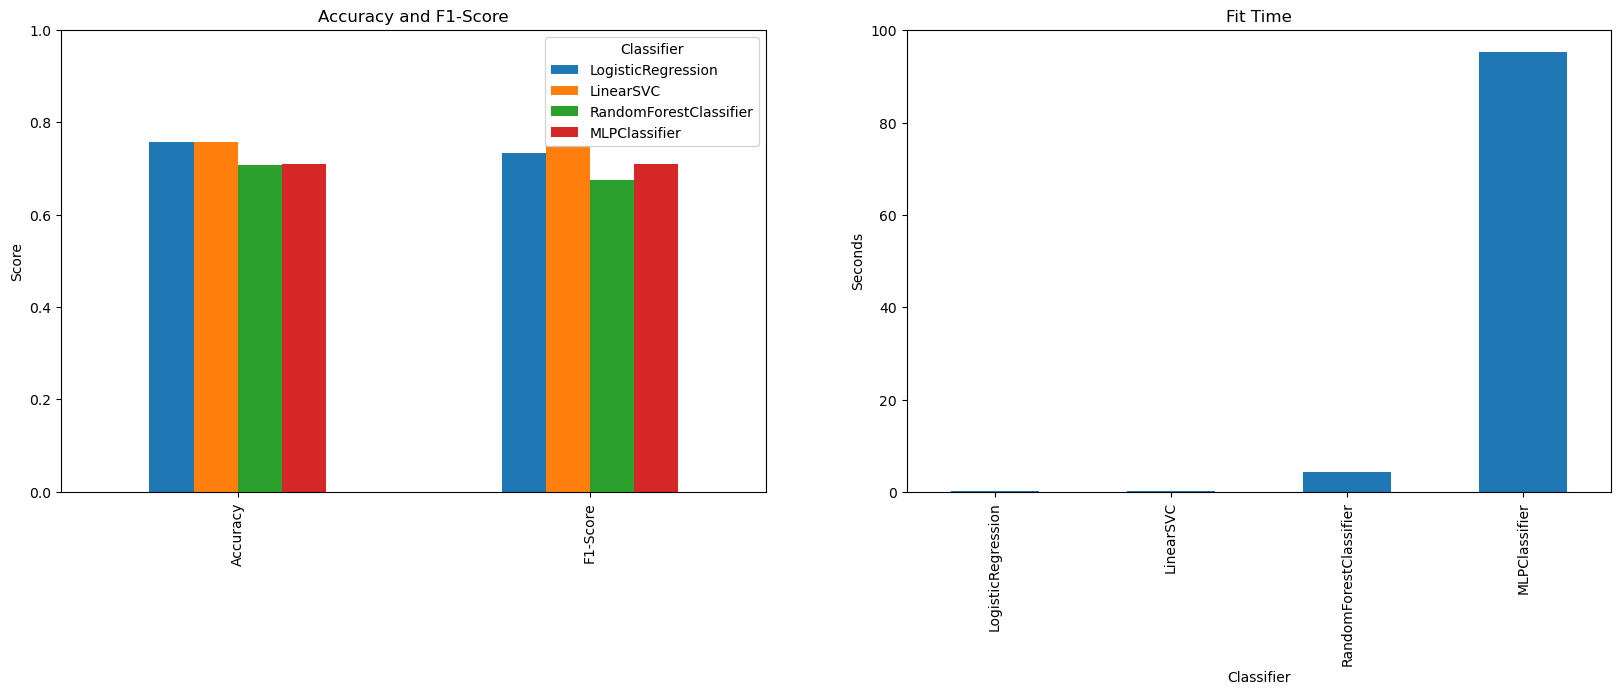

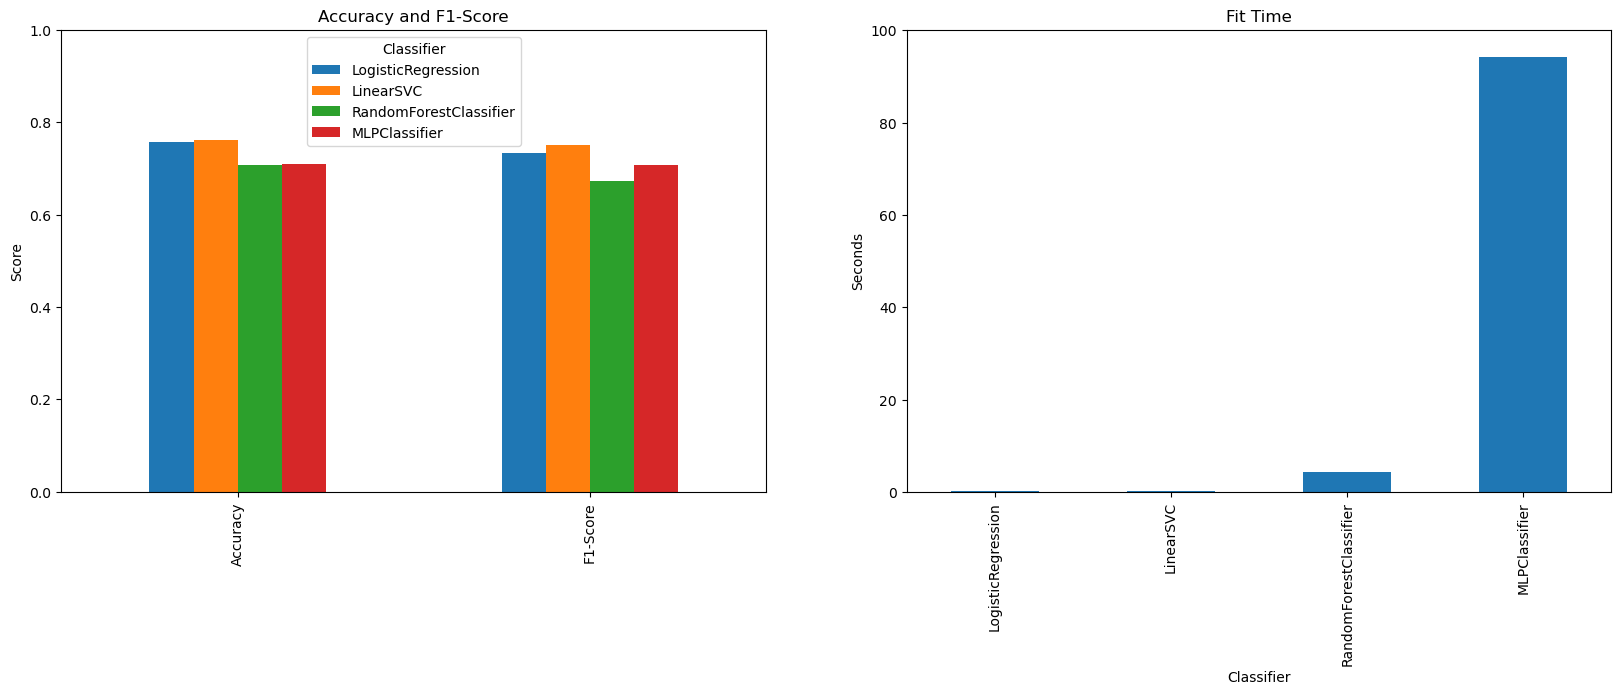

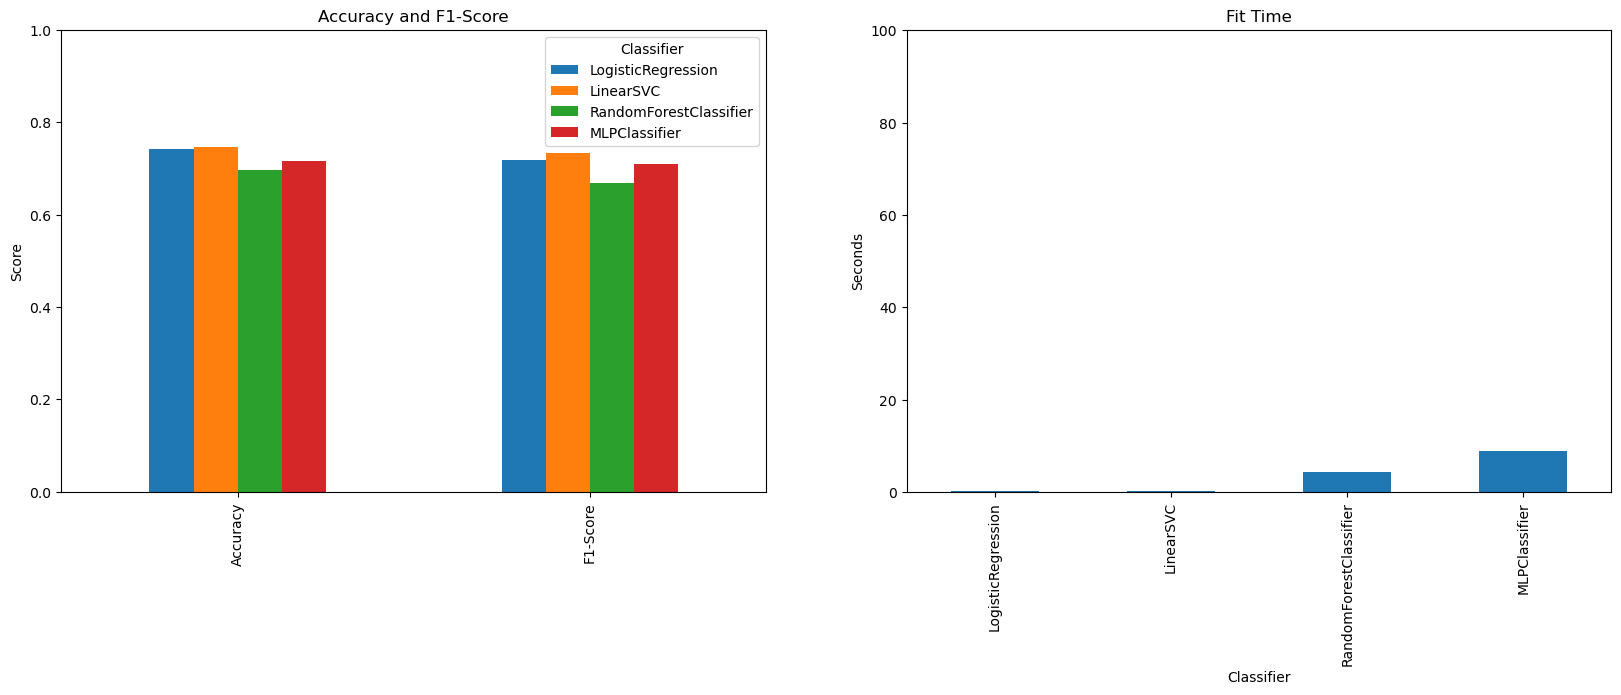

In [8]:
max_fit_time = max(result['Fit Time'].max() for result in [results_v1_df, results_v2_df, results_v3_df])

for result in [results_v1_df, results_v2_df, results_v3_df]:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    result[['Accuracy', 'F1-Score']].T.plot(kind='bar', ax=ax[0])
    ax[0].set_ylim(0, 1)
    ax[0].set_ylabel('Score')
    ax[0].set_title('Accuracy and F1-Score')

    result['Fit Time'].plot(kind='bar', ax=ax[1])
    ax[1].set_ylim(0, max_fit_time * 1.05)
    ax[1].set_ylabel('Seconds')
    ax[1].set_title('Fit Time')
    plt.show()


Next, we try to showcase the effect of standard-normalization in the pipeline. We chose the second case as a test.

In [14]:
from sklearn.preprocessing import StandardScaler
vectorizer4 = TfidfVectorizer(max_features=2500)

cv_results_v4 = []
for classifier in classifiers:
    pipe4 = Pipeline([('vectorizer', vectorizer4), ('scaler', StandardScaler(with_mean=False)), ('classifier', classifier)])
    scores = cross_validate(pipe4, X, Y, cv=5, scoring=scorers, return_train_score=False, n_jobs=-1)
    cv_results_v4.append({
            'Classifier': classifier.__class__.__name__,
            'Accuracy': scores['test_accuracy_score'].mean(),
            'F1-Score': scores['test_f1_score'].mean(),
            'Fit Time': scores['fit_time'].mean(),
        })
results_v4_df = pd.DataFrame(cv_results_v4).set_index("Classifier")
results_v4_df

,Accuracy,F1-Score,Fit Time
Classifier,,,
LogisticRegression,0.708197,0.705795,0.410039
LinearSVC,0.698361,0.699397,0.778875
RandomForestClassifier,0.706967,0.672686,3.424242
MLPClassifier,0.736817,0.731284,39.721412


Finally, we explored the use of text preprocessing as a preliminary step to check if it impacts our metrics. As before, we use the second case as a test.

In [13]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' .join(emoticons).replace('-', ''))
    ret_text = ""
    for word in text.split():
        if word not in stop:
            ret_text += word + " "
    ret_text = ret_text.strip()
    if len(ret_text) == 0:
        ret_text = "Invalid"
    return ret_text
X_processed = X.apply(preprocessor)

vectorizer5 = TfidfVectorizer(max_features=2500)
cv_results_v5 = []
for classifier in classifiers:
    pipe5 = Pipeline([('vectorizer', vectorizer5), ('classifier', classifier)])
    scores = cross_validate(pipe5, X_processed, Y, cv=5, scoring=scorers, return_train_score=False, n_jobs=-1)
    cv_results_v5.append({
            'Classifier': classifier.__class__.__name__,
            'Accuracy': scores['test_accuracy_score'].mean(),
            'F1-Score': scores['test_f1_score'].mean(),
            'Fit Time': scores['fit_time'].mean(),
        })
results_v5_df = pd.DataFrame(cv_results_v5).set_index("Classifier")
results_v5_df

<>:8: SyntaxWarning: invalid escape sequence '\)'
<>:9: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\)'
<>:9: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Nicklamda\AppData\Local\Temp\ipykernel_17524\1643208386.py:8: SyntaxWarning: invalid escape sequence '\)'
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
C:\Users\Nicklamda\AppData\Local\Temp\ipykernel_17524\1643208386.py:9: SyntaxWarning: invalid escape sequence '\W'
  text = (re.sub('[\W]+', ' ', text.lower()) + ' ' .join(emoticons).replace('-', ''))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nicklamda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Accuracy,F1-Score,Fit Time
Classifier,,,
LogisticRegression,0.732309,0.702207,0.137662
LinearSVC,0.732240,0.720852,0.119892
RandomForestClassifier,0.691667,0.660192,3.762348
MLPClassifier,0.690301,0.688237,89.023498


# Discussion
 Although, Random Forests and Multi Layer Perceptron provide moderately good performance, in our opinion, they shouldn't be used in this dataset because of large fit time and lower accuarcy than Logistic Regression and SVM. We observe that the Logistic Regression and SVM models outperform the other two, albeit marginally, but for a fraction of their fit time. Between the two, we conclude that SVM is the most suitable for this specific task. We tried using Standard Scaler after vectorizing in the pipeline,we observed that standardization reduces the acuraccy of all the classifiers except MLP which greatly improves the acuraccy and fit time.In our opinion, standardization should not be implimented because the acuraccy of the best classifier without it (SVM) is still better than MLP.Additionally, we applied some text cleaning such as removing punctuation and stop words, the results showed that the overall acuraccy for all the classifiers dropped but the fit time also dropped.Again, we think that this preprocessing step should not be implemented,because the trade off is not worth it.